In [26]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from dmba import classificationSummary, liftChart, gainsChart

df_Ubank = pd.read_excel('Universalbank_1500-1.xlsx').drop(columns = ['ID', 'ZIP Code'])
df_Ubank.head(5)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [27]:
Ubank_acc = df_Ubank[df_Ubank['Personal Loan']==1].drop(columns = ['Personal Loan'])
Ubank_non = df_Ubank[df_Ubank['Personal Loan']==0].drop(columns = ['Personal Loan'])

In [28]:
# Acceptors
pd.DataFrame({'mean': Ubank_acc.iloc[:, [0,1,2,3,4,6]].mean(), 'standard deviation': Ubank_acc.iloc[:, [0,1,2,3,4,6]].std()}).transpose()

,Age,Experience,Income,Family,CCAvg,Mortgage
mean,46.013158,20.921053,144.440789,2.592105,3.937500,98.157895
standard deviation,12.209532,12.236373,33.155211,1.117917,2.059184,150.803855


In [29]:
# Nonacceptors
pd.DataFrame({'mean': Ubank_non.iloc[:, [0,1,2,3,4,6]].mean(), 'standard deviation': Ubank_non.iloc[:, [0,1,2,3,4,6]].std()}).transpose()

,Age,Experience,Income,Family,CCAvg,Mortgage
mean,45.183976,19.927300,66.337537,2.403561,1.762834,51.045994
standard deviation,11.566482,11.572401,39.822261,1.170810,1.618975,90.948125


In [30]:
# Acceptors
dic_temp = {}

for col in [5,7,8,9,10]:
  temp = pd.DataFrame(Ubank_acc.iloc[:, col].value_counts(normalize = True))
  temp.columns = ['Percentage']
  dic_temp[Ubank_acc.columns[col]] = temp

pd.concat(dic_temp)

Percentage
Education          3    0.407895
                   2    0.401316
                   1    0.190789
Securities Account 0    0.888158
                   1    0.111842
CD Account         0    0.703947
                   1    0.296053
Online             1    0.638158
                   0    0.361842
CreditCard         0    0.736842
                   1    0.263158

In [31]:
# Nonacceptors
dic_temp = {}

for col in [5,7,8,9,10]:
  temp = pd.DataFrame(Ubank_non.iloc[:, col].value_counts(normalize = True))
  temp.columns = ['Percentage']
  dic_temp[Ubank_non.columns[col]] = temp

pd.concat(dic_temp)

Percentage
Education          1    0.455490
                   3    0.278190
                   2    0.266320
Securities Account 0    0.893917
                   1    0.106083
CD Account         0    0.965875
                   1    0.034125
Online             1    0.601632
                   0    0.398368
CreditCard         0    0.706973
                   1    0.293027

In [32]:
# Turn Education into dummy variables
df_Ubank['Education'] = df_Ubank['Education'].astype('category')
new_categories = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
df_Ubank.Education.cat.rename_categories(new_categories, inplace = True)
df_Ubank = pd.get_dummies(df_Ubank, prefix_sep = '_', drop_first = True)

Ubank_X = df_Ubank.drop(columns = ['Personal Loan']) 
Ubank_y = df_Ubank['Personal Loan'] 

In [33]:
Ubank_X.head(5)

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional
0,25,1,49,4,1.6,0,1,0,0,0,0,0
1,45,19,34,3,1.5,0,1,0,0,0,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,0
3,35,9,100,1,2.7,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,1,1,0


In [34]:
# Partition Data 
train_X, valid_X, train_y, valid_y = train_test_split(Ubank_X, Ubank_y, test_size = 0.4, random_state = 1)

In [35]:
lda_reg = LinearDiscriminantAnalysis()
lda_reg.fit(train_X, train_y)

# Confusion Matrix for Validation Set
classificationSummary(valid_y, lda_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9233)

       Prediction
Actual   0   1
     0 521  11
     1  35  33


In [36]:
result = valid_X.copy()
result['Actual Class'] = valid_y
result['Predicted Class'] = lda_reg.predict(valid_X)
result['P(acceptor)'] = lda_reg.predict_proba(valid_X)[:, 1]

In [37]:
# Select three customers who were misclassified as acceptors
mis_as_acc = result[(result['Actual Class'] == 0) & (result['Predicted Class'] == 1)].head(3)
mis_as_acc

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional,Actual Class,Predicted Class,P(acceptor)
335,56,32,122,2,0.3,360,0,1,1,1,0,0,0,1,0.947658
895,43,17,84,4,2.6,289,1,1,1,1,0,1,0,1,0.937417
629,45,19,71,4,2.9,218,0,1,1,1,0,0,0,1,0.637197


In [38]:
# Select three customers who were misclassified as nonacceptors
mis_as_non = result[(result['Actual Class'] == 1) & (result['Predicted Class'] == 0)].head(3)
mis_as_non

,Age,Experience,Income,Family,CCAvg,Mortgage,Securities Account,CD Account,Online,CreditCard,Education_Graduate,Education_Advanced/Professional,Actual Class,Predicted Class,P(acceptor)
1285,38,13,113,4,1.7,0,0,0,0,1,1,0,1,0,0.068604
1126,32,8,104,2,3.7,0,0,0,0,1,0,0,1,0,0.000681
1141,32,7,143,3,2.9,0,0,0,1,0,0,1,1,0,0.415827


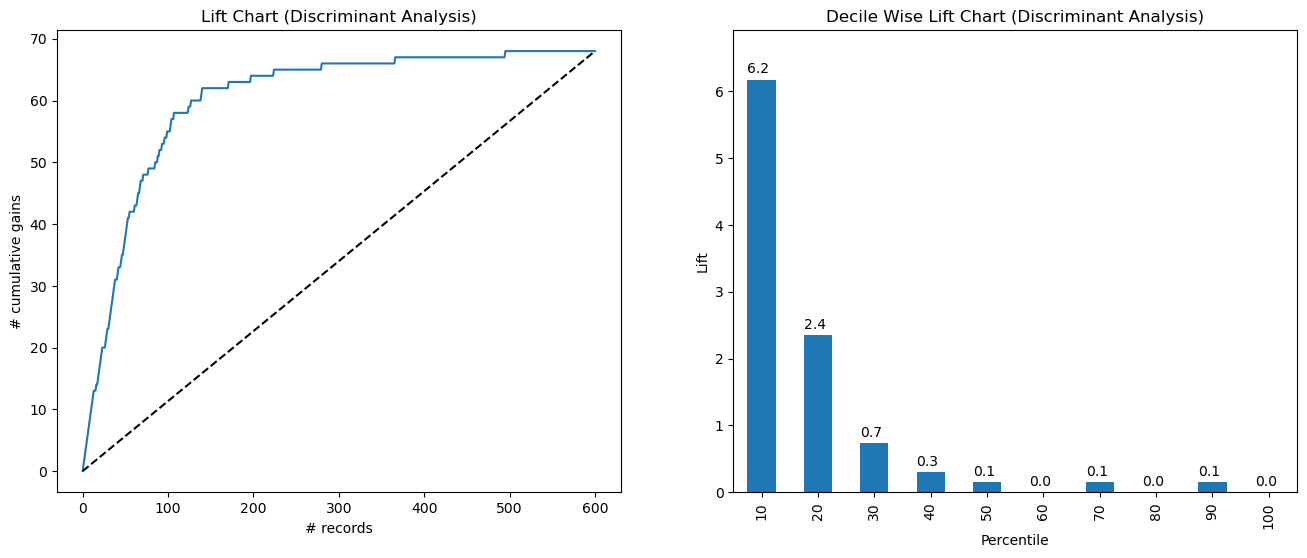

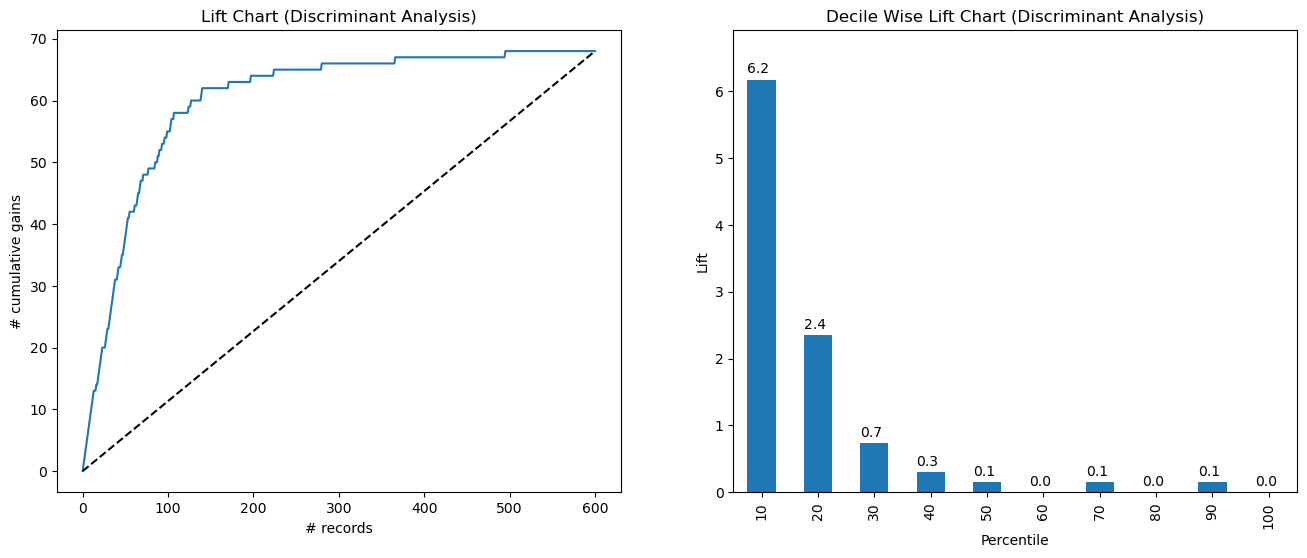

In [39]:
df_lift = result.sort_values(by = 'P(acceptor)', ascending = False)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Lift Chart
ax = gainsChart(df_lift['Actual Class'], ax = axes[0])
ax.set_title('Lift Chart (Discriminant Analysis)')

# DecileWise Lift Chart
ax = liftChart(df_lift['Actual Class'], ax = axes[1])
ax.set_title('Decile Wise Lift Chart (Discriminant Analysis)')

fig

In [40]:
log_reg = LogisticRegression(penalty = 'l2', C = 1e42, solver = 'liblinear')
log_reg.fit(train_X, train_y)

# Confusion Matrix for Validation Set
classificationSummary(valid_y, log_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.9517)

       Prediction
Actual   0   1
     0 529   3
     1  26  42


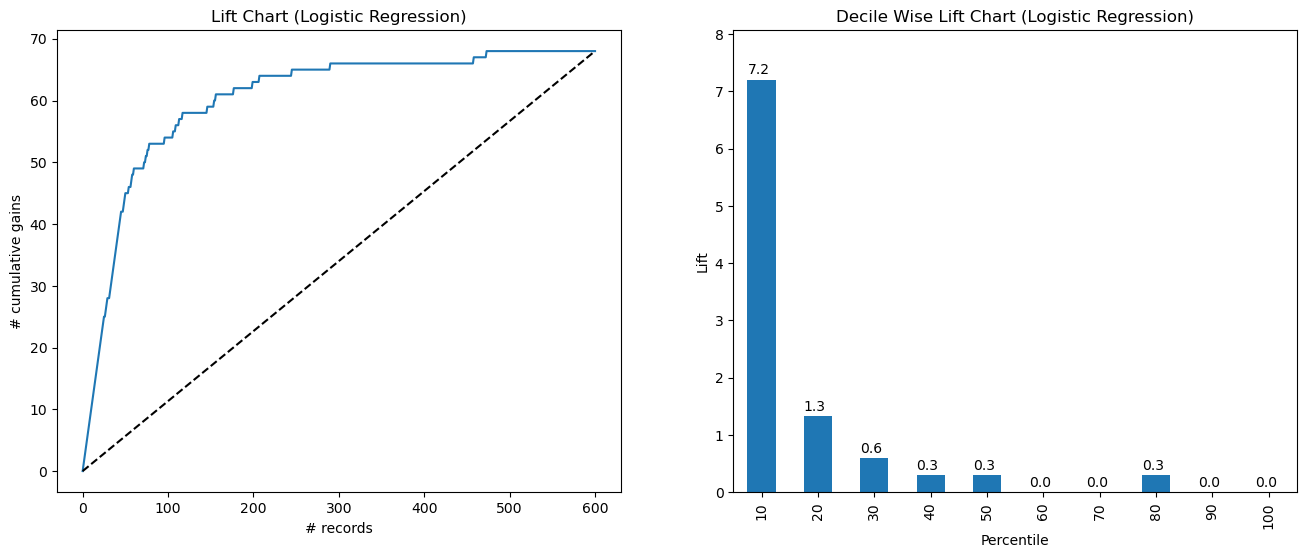

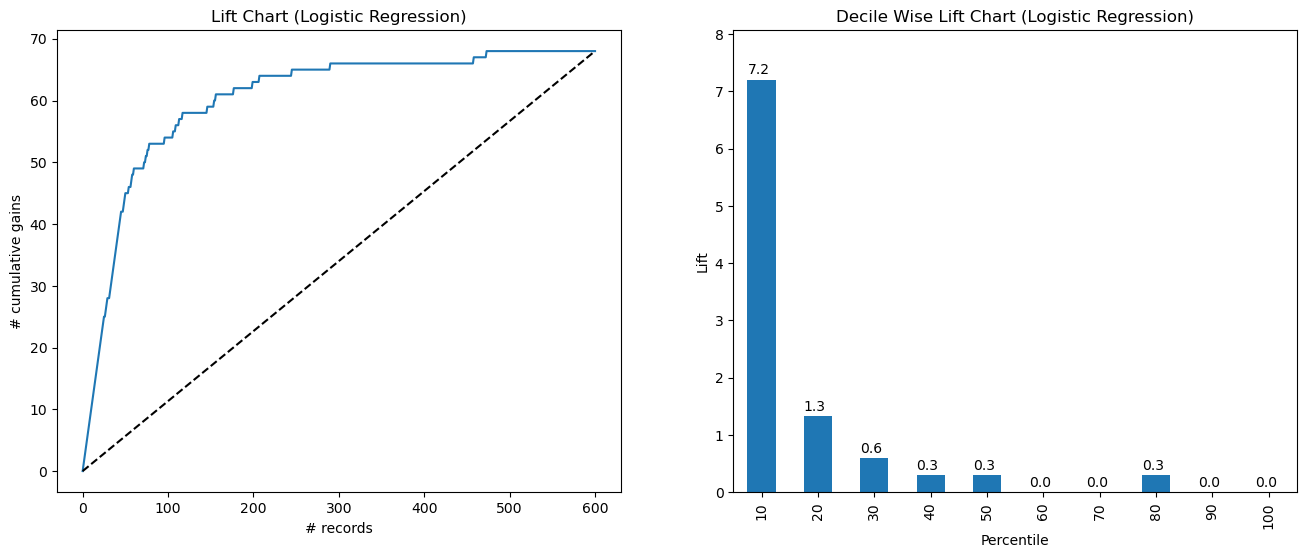

In [41]:
result_logit = pd.DataFrame({'Actual Class': valid_y, 
                             'P(nonacceptor)': [p[0] for p in log_reg.predict_proba(valid_X)], 
                             'P(acceptor)': [p[1] for p in log_reg.predict_proba(valid_X)], 
                             'Predicted Class': log_reg.predict(valid_X) })

logit_lift = result_logit.sort_values(by = 'P(acceptor)', ascending = False)
fig, axes = plt.subplots(1, 2, figsize = (16, 6))

# Lift Chart
ax = gainsChart(logit_lift['Actual Class'], ax = axes[0])
ax.set_title('Lift Chart (Logistic Regression)')

# DecileWise Lift Chart
ax = liftChart(logit_lift['Actual Class'], ax = axes[1])
ax.set_title('Decile Wise Lift Chart (Logistic Regression)')

fig

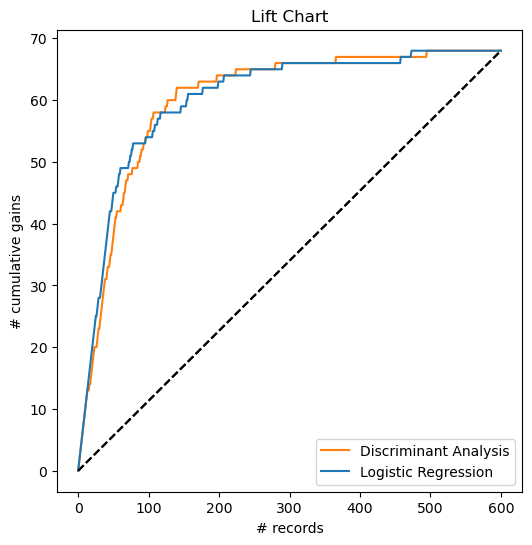

In [42]:
# Comparison of the Lift Chart
fig, axes = plt.subplots(1, 1, figsize = (6, 6))
ax = gainsChart(df_lift['Actual Class'], color = 'C1', ax = axes, label = 'Discriminant Analysis')
ax.set_title('Lift Chart')
gainsChart(logit_lift['Actual Class'], color = 'C0', ax = ax, label = 'Logistic Regression')
plt.legend()
plt.show()